# **Dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
url="https://raw.githubusercontent.com/SitiFadhilahRahmi/Project_Akhir_PraktikumBigData_Siti-Fadhilah-Rahmi_2311532003/refs/heads/main/netflix_customer_churn.csv"
df = pd.read_csv(url)
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [3]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [5]:
df.isna().sum()

,0
customer_id,0
age,0
gender,0
subscription_type,0
watch_hours,0
last_login_days,0
region,0
device,0
monthly_fee,0
churned,0


In [6]:
df = df.drop(columns=['customer_id'])
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


# **Exploratory Data Analysis (EDA)**

<Axes: xlabel='churned', ylabel='count'>

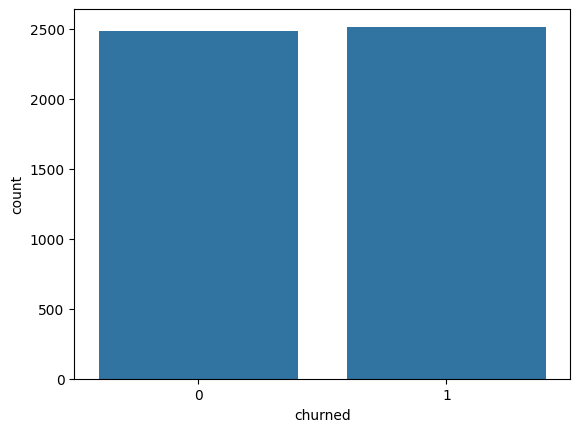

In [7]:
sns.countplot(data=df,x=df['churned'])

<Axes: xlabel='gender', ylabel='count'>

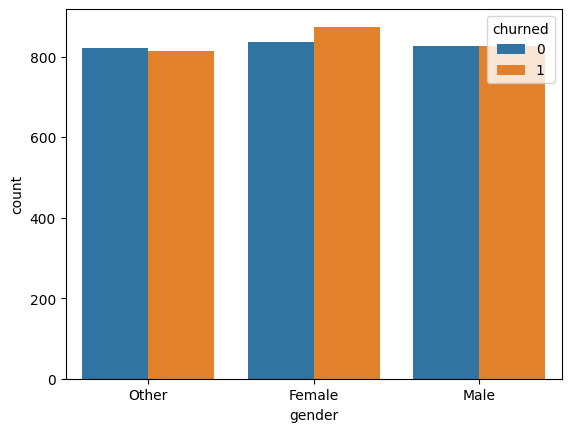

In [8]:
sns.countplot(data=df,hue=df['churned'],x=df['gender'])

<Axes: xlabel='subscription_type', ylabel='count'>

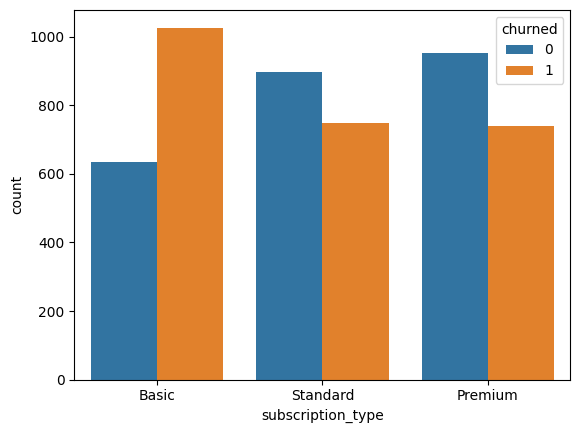

In [9]:
sns.countplot(data=df,hue=df['churned'],x=df['subscription_type'])

<Axes: xlabel='device', ylabel='count'>

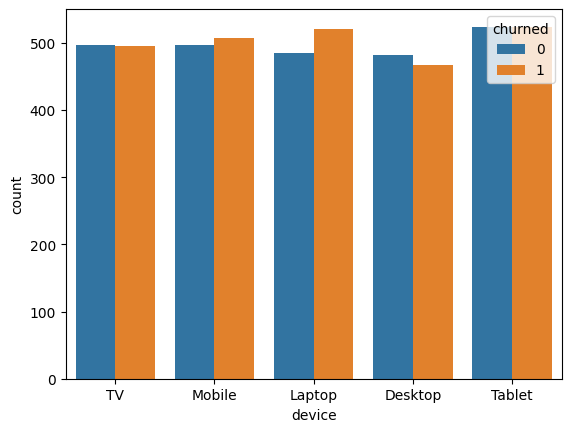

In [10]:
sns.countplot(data=df,x=df['device'],hue=df['churned'])

<Axes: xlabel='region', ylabel='count'>

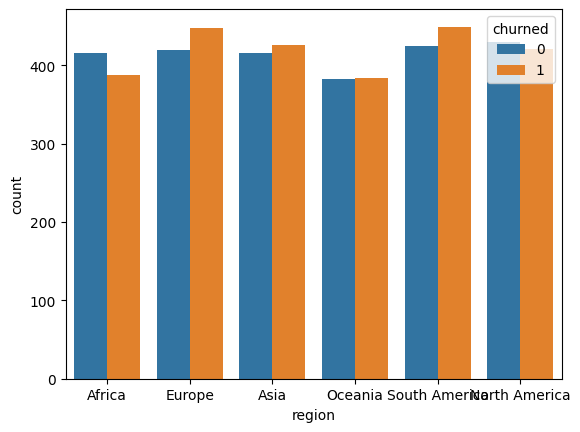

In [11]:
sns.countplot(data=df,x=df['region'],hue=df['churned'])

<Axes: xlabel='favorite_genre', ylabel='count'>

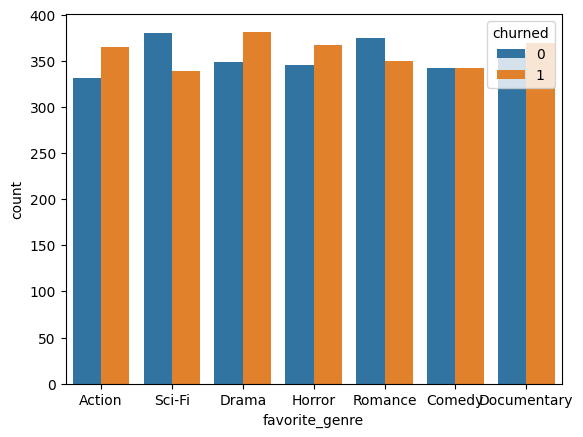

In [12]:
sns.countplot(data=df,x=df['favorite_genre'],hue=df['churned'])

<Axes: xlabel='payment_method', ylabel='count'>

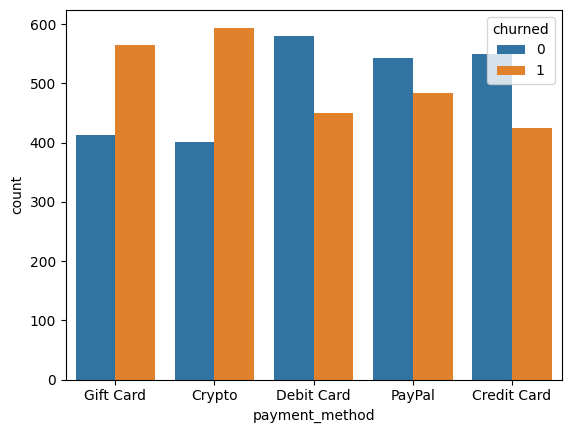

In [13]:
sns.countplot(data=df,x=df['payment_method'],hue=df['churned'])

<Axes: xlabel='number_of_profiles', ylabel='count'>

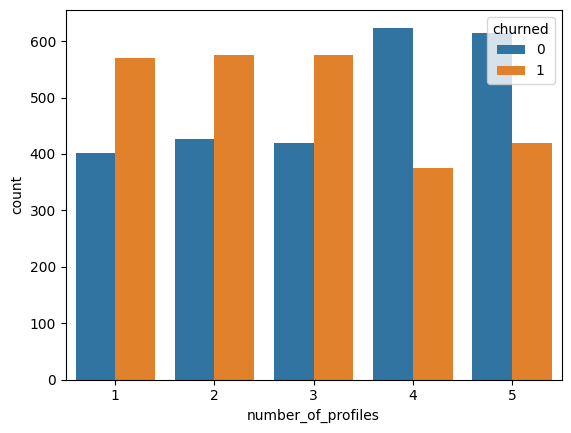

In [14]:
sns.countplot(data=df,x=df['number_of_profiles'],hue=df['churned'])

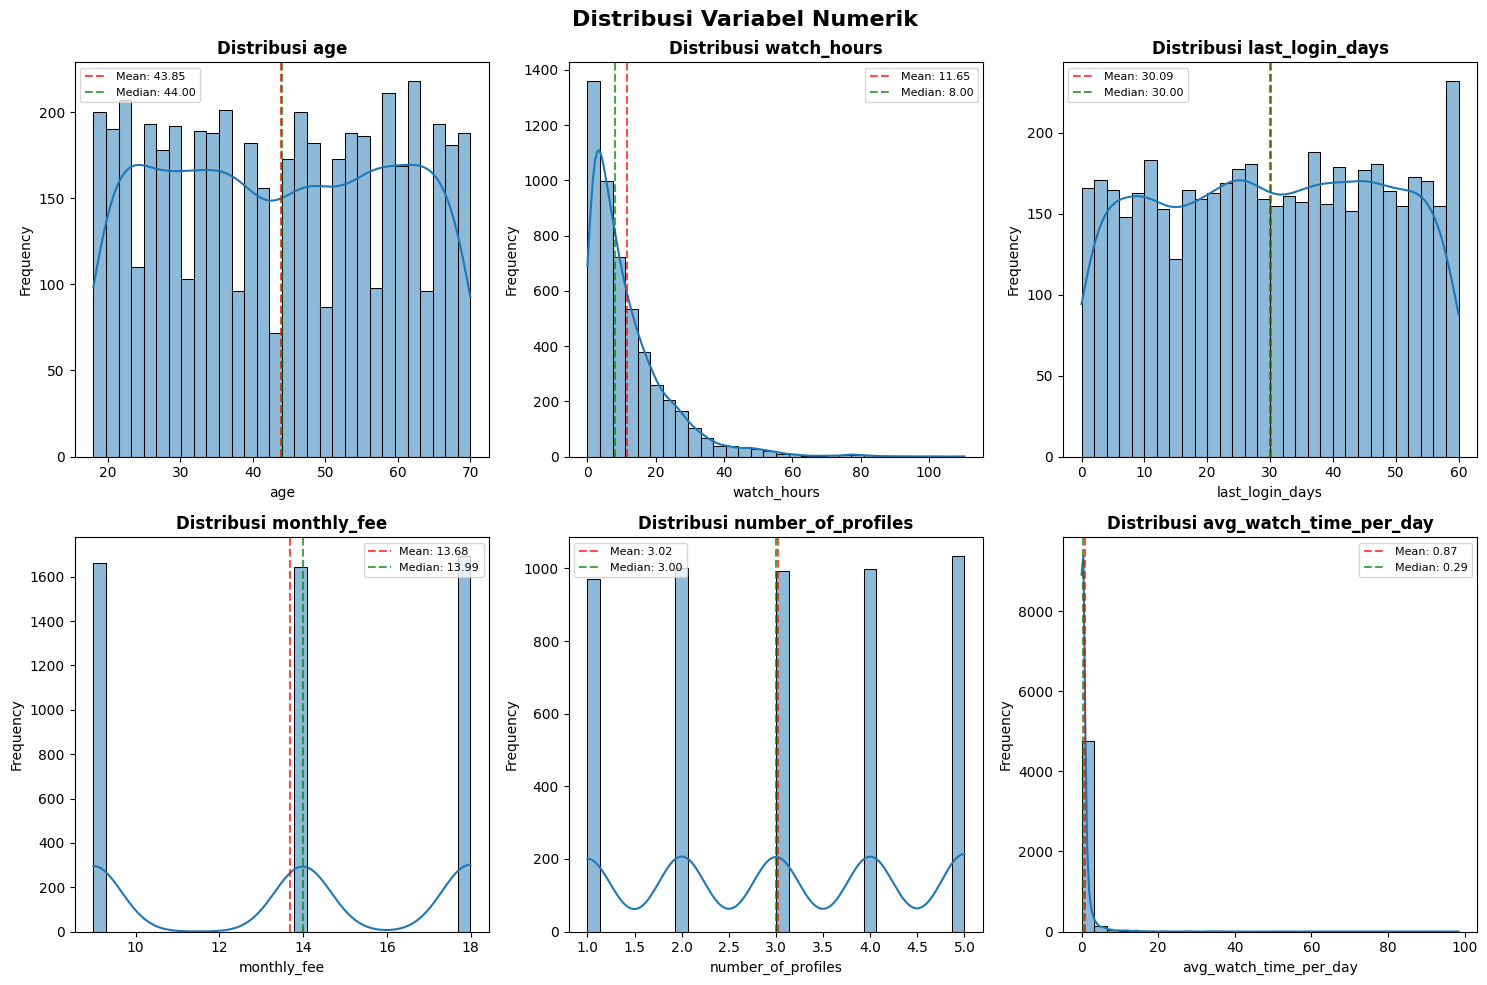

In [15]:
numerical_cols = ['age', 'watch_hours', 'last_login_days',
                  'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day']

# Visualisasi distribusi untuk setiap variabel numerik
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribusi Variabel Numerik', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    row = idx // 3
    col_pos = idx % 3

    ax = axes[row, col_pos]
    # Histogram dengan KDE
    sns.histplot(data=df, x=col, kde=True, ax=ax, bins=30)
    ax.set_title(f'Distribusi {col}', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

    # Tambahkan garis mean dan median
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:.2f}')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

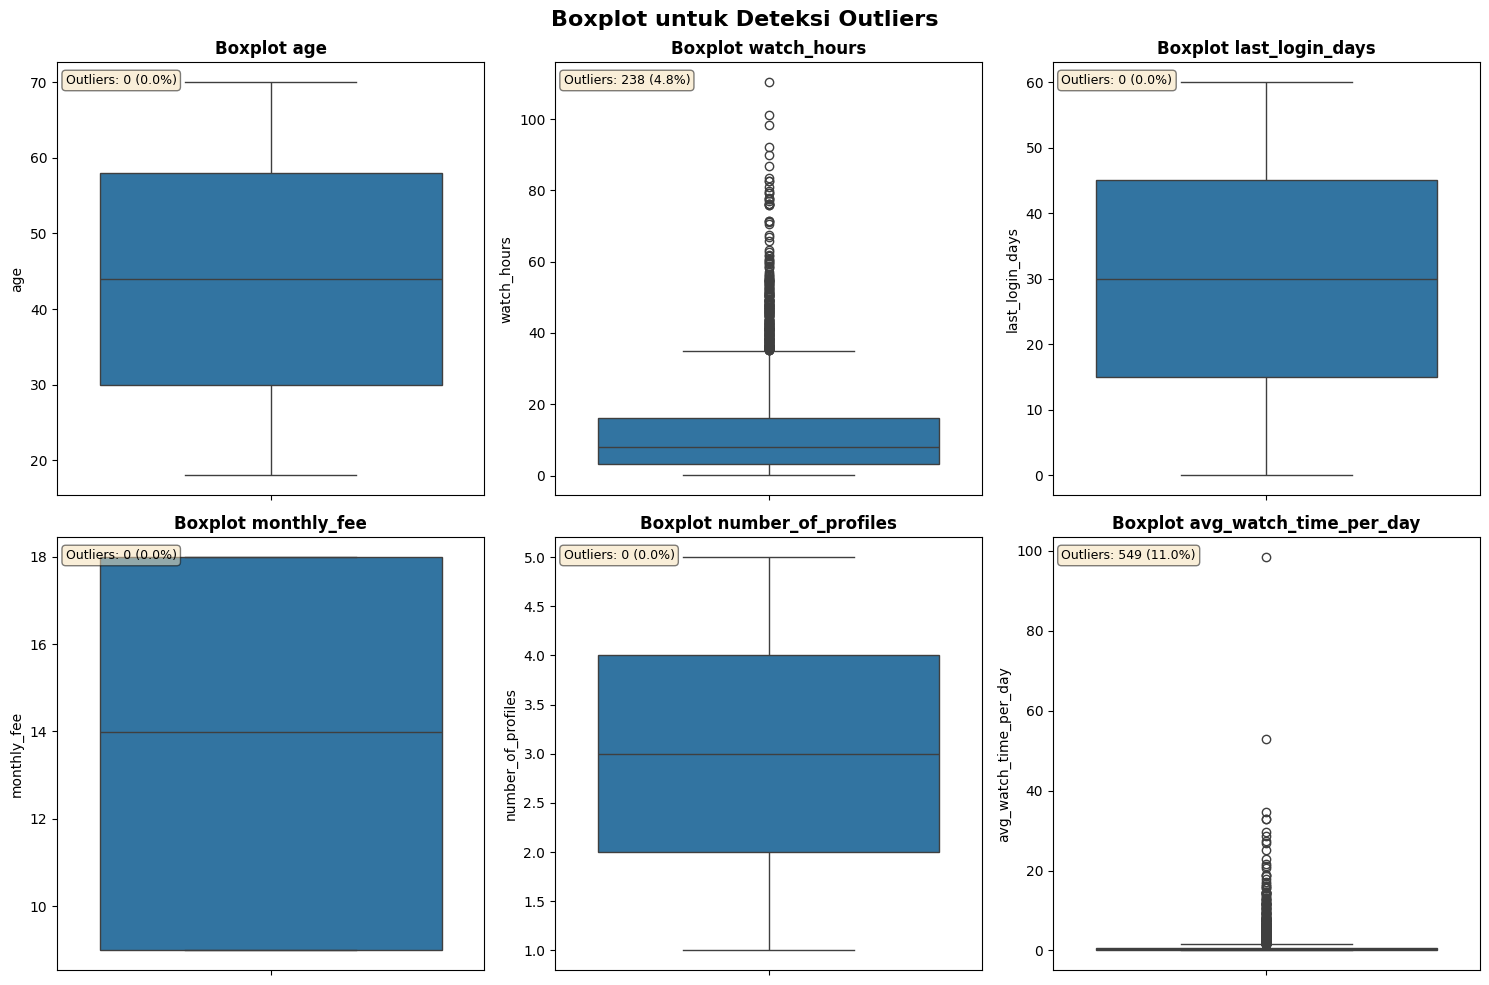

In [16]:
# Boxplot untuk mendeteksi outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Boxplot untuk Deteksi Outliers', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    row = idx // 3
    col_pos = idx % 3

    ax = axes[row, col_pos]
    sns.boxplot(data=df, y=col, ax=ax)
    ax.set_title(f'Boxplot {col}', fontweight='bold')
    ax.set_ylabel(col)

    # Hitung dan tampilkan jumlah outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    ax.text(0.02, 0.95, f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)',
            transform=ax.transAxes, fontsize=9,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

In [17]:
# Analisis outlier watch_hours
print("ANALISIS OUTLIER WATCH_HOURS")
print("-" * 40)
watch_hours_stats = df['watch_hours'].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.95, 0.99])
print(watch_hours_stats)

print(f"\nJumlah baris dengan watch_hours > 50: {(df['watch_hours'] > 50).sum()}")
print(f"Jumlah baris dengan watch_hours > 100: {(df['watch_hours'] > 100).sum()}")

# Analisis outlier avg_watch_time_per_day
print("\n" + "="*60)
print("ANALISIS OUTLIER AVG_WATCH_TIME_PER_DAY")
print("-" * 40)
avg_time_stats = df['avg_watch_time_per_day'].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.95, 0.99])
print(avg_time_stats)

print(f"\nJumlah baris dengan avg_time > 5 jam: {(df['avg_watch_time_per_day'] > 5).sum()}")
print(f"Jumlah baris dengan avg_time > 10 jam: {(df['avg_watch_time_per_day'] > 10).sum()}")

ANALISIS OUTLIER WATCH_HOURS
----------------------------------------
count    5000.000000
mean       11.649450
std        12.014654
min         0.010000
1%          0.150000
25%         3.337500
50%         8.000000
75%        16.030000
95%        34.395500
99%        54.981500
max       110.400000
Name: watch_hours, dtype: float64

Jumlah baris dengan watch_hours > 50: 83
Jumlah baris dengan watch_hours > 100: 2

ANALISIS OUTLIER AVG_WATCH_TIME_PER_DAY
----------------------------------------
count    5000.000000
mean        0.874800
std         2.619824
min         0.000000
1%          0.000000
25%         0.110000
50%         0.290000
75%         0.720000
95%         3.160500
99%        10.921600
max        98.420000
Name: avg_watch_time_per_day, dtype: float64

Jumlah baris dengan avg_time > 5 jam: 149
Jumlah baris dengan avg_time > 10 jam: 57


In [18]:
# Lihat apakah outlier lebih mungkin churn atau tidak
def analyze_outlier_churn(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    non_outliers = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]

    churn_rate_outliers = outliers['churned'].mean()
    churn_rate_non_outliers = non_outliers['churned'].mean()

    return {
        'column': column,
        'total_outliers': len(outliers),
        'outlier_percentage': len(outliers)/len(df)*100,
        'churn_rate_outliers': churn_rate_outliers,
    }

# Analisis untuk kedua variabel
results = []
for col in ['watch_hours', 'avg_watch_time_per_day']:
    results.append(analyze_outlier_churn(df, col))

for r in results:
    print(f"\n{r['column'].upper()}:")
    print(f"  Outliers: {r['total_outliers']} ({r['outlier_percentage']:.1f}%)")
    print(f"  Churn rate outliers: {r['churn_rate_outliers']:.2%}")


WATCH_HOURS:
  Outliers: 238 (4.8%)
  Churn rate outliers: 0.84%

AVG_WATCH_TIME_PER_DAY:
  Outliers: 549 (11.0%)
  Churn rate outliers: 1.09%


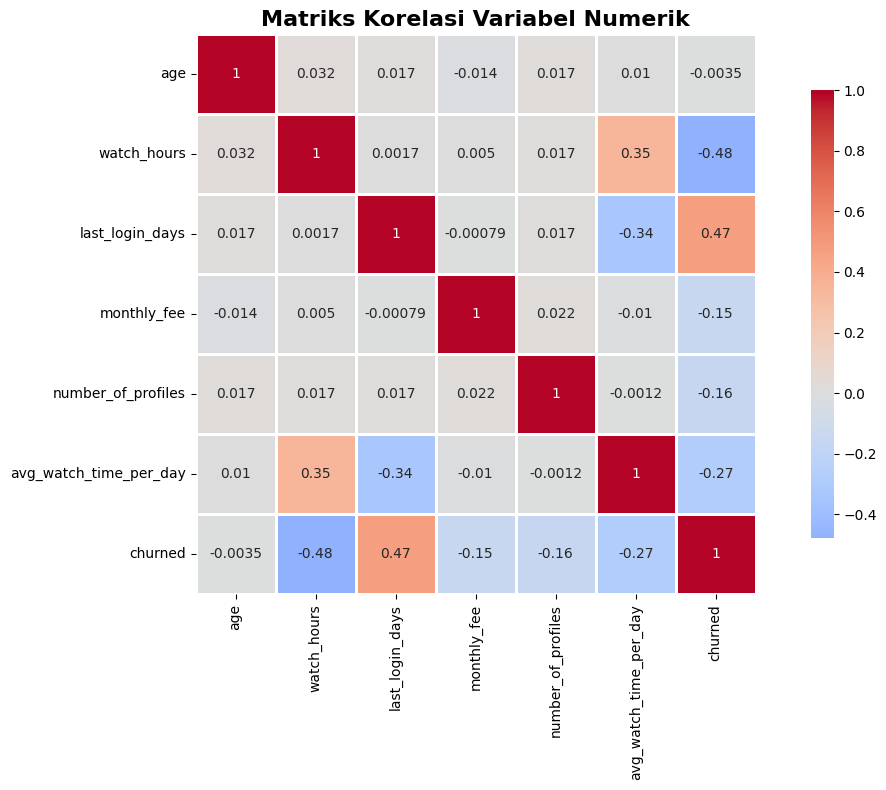

In [19]:
# Matriks korelasi
correlation_matrix = df[numerical_cols + ['churned']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriks Korelasi Variabel Numerik', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

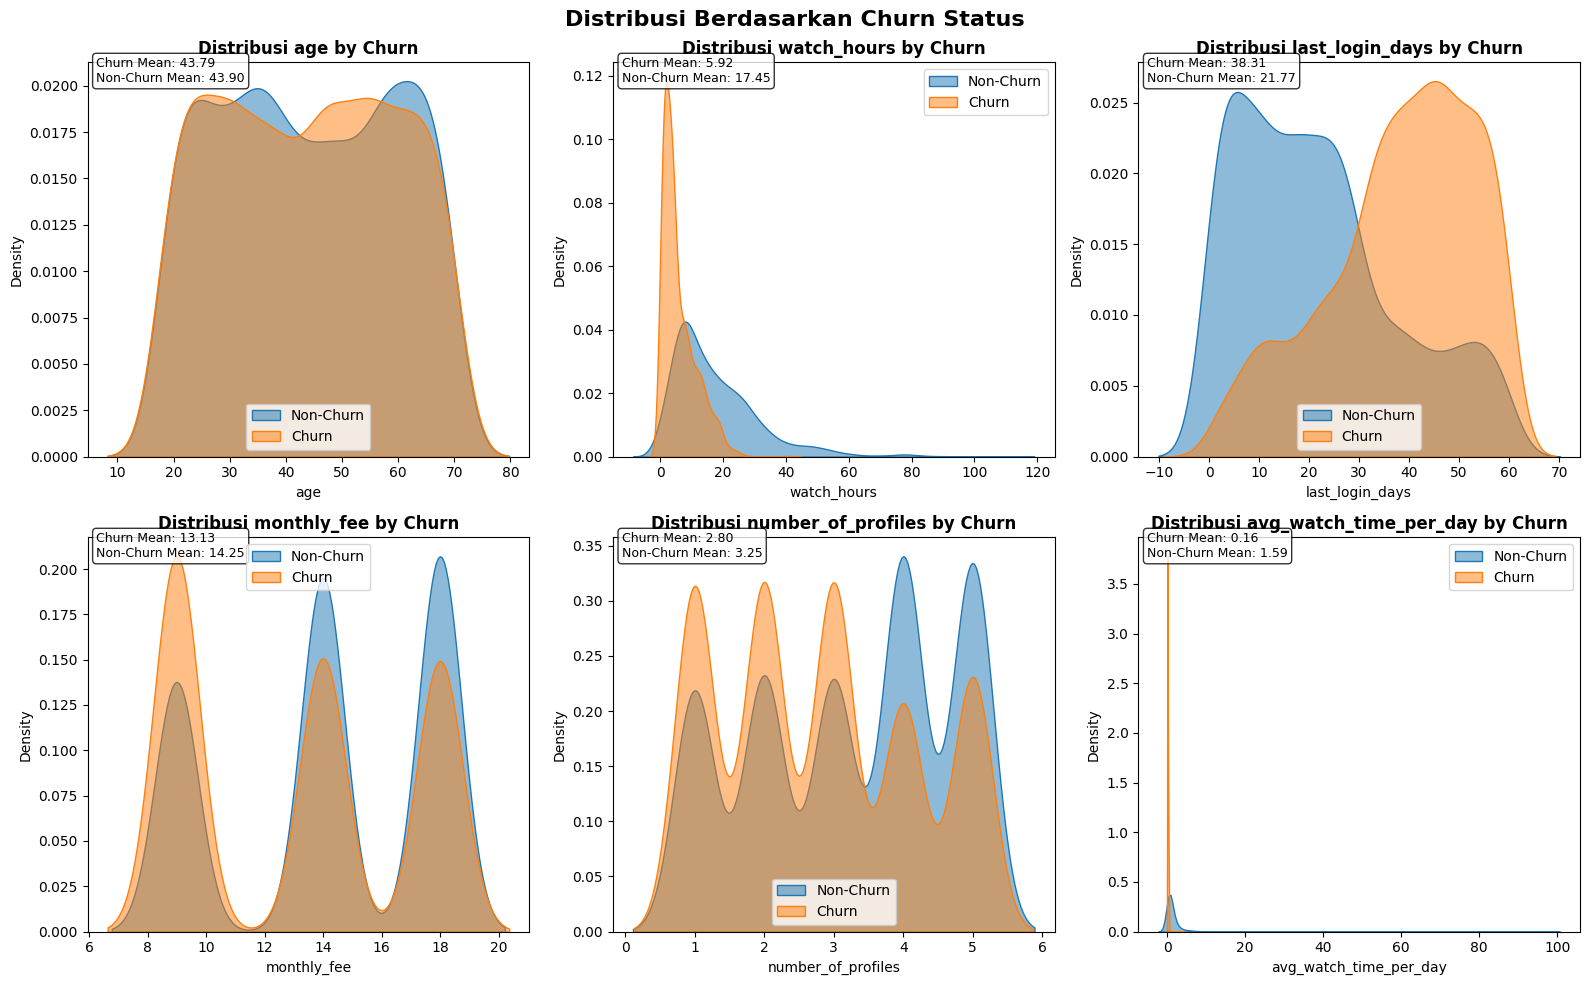

In [20]:
# Visualisasi perbedaan distribusi berdasarkan churn status
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribusi Berdasarkan Churn Status', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    row = idx // 3
    col_pos = idx % 3

    ax = axes[row, col_pos]

    # Density plot untuk churn vs non-churn
    sns.kdeplot(data=df[df['churned'] == 0], x=col, label='Non-Churn', fill=True, alpha=0.5, ax=ax)
    sns.kdeplot(data=df[df['churned'] == 1], x=col, label='Churn', fill=True, alpha=0.5, ax=ax)

    ax.set_title(f'Distribusi {col} by Churn', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    ax.legend()

    # Tambahkan statistik ringkasan
    churn_mean = df[df['churned'] == 1][col].mean()
    non_churn_mean = df[df['churned'] == 0][col].mean()

    ax.text(0.02, 0.95, f'Churn Mean: {churn_mean:.2f}\nNon-Churn Mean: {non_churn_mean:.2f}',
            transform=ax.transAxes, fontsize=9,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [22]:
X = df.drop("churned", axis=1)
y = df["churned"]

In [23]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

print("Kolom Numerik:")
print(numeric_features)

print("\nKolom Kategorikal:")
print(categorical_features)

Kolom Numerik:
Index(['age', 'watch_hours', 'last_login_days', 'monthly_fee',
       'number_of_profiles', 'avg_watch_time_per_day'],
      dtype='object')

Kolom Kategorikal:
Index(['gender', 'subscription_type', 'region', 'device', 'payment_method',
       'favorite_genre'],
      dtype='object')


In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),

        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

In [25]:
X_processed = preprocessor.fit_transform(X)

print("Shape data setelah preprocessing:", X_processed.shape)

Shape data setelah preprocessing: (5000, 35)


In [26]:
# Nama fitur hasil One-Hot Encoding
encoded_feature_names = (
    preprocessor
    .named_transformers_["cat"]
    .get_feature_names_out(categorical_features)
)

# Gabungkan dengan fitur numerik
final_feature_names = list(numeric_features) + list(encoded_feature_names)

In [27]:
df= pd.DataFrame(
    X_processed,
    columns=final_feature_names
)

In [28]:
df.head()

,age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day,gender_Female,gender_Male,gender_Other,subscription_type_Basic,...,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Action,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,0.461471,0.256425,-0.062152,-1.271341,-1.429965,-0.146895,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.203399,-0.911432,-0.632462,0.083051,1.395494,-0.322497,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.086959,0.388777,-1.145741,0.083051,-0.723600,0.231031,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.590506,-0.594288,-1.031679,1.166565,-0.723600,-0.200339,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.784060,-0.812377,-0.974648,0.083051,-0.723600,-0.284322,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (4000, 12)
Test shape: (1000, 12)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

logreg_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

logreg_pipeline.fit(X_train, y_train)

y_pred_lr = logreg_pipeline.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.887
[[432  65]
 [ 48 455]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       497
           1       0.88      0.90      0.89       503

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest
Accuracy: 0.977
[[485  12]
 [ 11 492]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       497
           1       0.98      0.98      0.98       503

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [32]:
from sklearn.svm import SVC

svm_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", SVC(
        kernel="rbf",
        C=1.0,
        gamma="scale",
        probability=True,
        random_state=42
    ))
])
svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

print("Support Vector Machine (SVM)")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM)
Accuracy: 0.907
[[445  52]
 [ 41 462]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       497
           1       0.90      0.92      0.91       503

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



In [33]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__penalty": ["l2"],
    "classifier__solver": ["lbfgs"]
}

grid_lr = GridSearchCV(
    logreg_pipeline,
    param_grid_lr,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)
print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best CV F1 Score:", grid_lr.best_score_)
best_lr = grid_lr.best_estimator_
y_pred_lr_tuned = best_lr.predict(X_test)

print("Tuned Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_tuned))
print(confusion_matrix(y_test, y_pred_lr_tuned))
print(classification_report(y_test, y_pred_lr_tuned))


Best Logistic Regression Params: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best CV F1 Score: 0.8979487923845794
Tuned Logistic Regression
Accuracy: 0.89
[[432  65]
 [ 45 458]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       497
           1       0.88      0.91      0.89       503

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist_rf = {
    "classifier__n_estimators": randint(100, 500),
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": randint(2, 10),
    "classifier__min_samples_leaf": randint(1, 5),
    "classifier__max_features": ["sqrt", "log2"]
}

random_rf = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_dist_rf,
    n_iter=30,
    cv=5,
    scoring="f1",
    random_state=42,
    n_jobs=-1
)
random_rf.fit(X_train, y_train)
print("Best Random Forest Params:", random_rf.best_params_)
print("Best CV F1 Score:", random_rf.best_score_)

best_rf_random = random_rf.best_estimator_
y_pred_rf_random = best_rf_random.predict(X_test)

print("Tuned Random Forest (RandomizedSearchCV)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_random))
print(confusion_matrix(y_test, y_pred_rf_random))
print(classification_report(y_test, y_pred_rf_random))

Best Random Forest Params: {'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 149}
Best CV F1 Score: 0.974300666316848
Tuned Random Forest (RandomizedSearchCV)
Accuracy: 0.98
[[486  11]
 [  9 494]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       497
           1       0.98      0.98      0.98       503

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [35]:
param_grid_svm = {
    "classifier__C": [0.1, 1, 10],
    "classifier__gamma": ["scale", 0.01, 0.1]
}

grid_svm = GridSearchCV(
    svm_pipeline,
    param_grid_svm,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid_svm.fit(X_train, y_train)
print("Best SVM Params:", grid_svm.best_params_)
print("Best CV F1 Score:", grid_svm.best_score_)

best_svm = grid_svm.best_estimator_
y_pred_svm_tuned = best_svm.predict(X_test)

print("Tuned SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_tuned))
print(confusion_matrix(y_test, y_pred_svm_tuned))
print(classification_report(y_test, y_pred_svm_tuned))

Best SVM Params: {'classifier__C': 10, 'classifier__gamma': 'scale'}
Best CV F1 Score: 0.906516788041492
Tuned SVM
Accuracy: 0.905
[[446  51]
 [ 44 459]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       497
           1       0.90      0.91      0.91       503

    accuracy                           0.91      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.91      0.91      0.90      1000



In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="weighted"),
        "Recall": recall_score(y_true, y_pred, average="weighted"),
        "F1-score": f1_score(y_true, y_pred, average="weighted")
    }

baseline_results = []

baseline_results.append({
    "Model": "Logistic Regression (Baseline)",
    **get_metrics(y_test, y_pred_lr)
})

baseline_results.append({
    "Model": "Random Forest (Baseline)",
    **get_metrics(y_test, y_pred_rf)
})

baseline_results.append({
    "Model": "SVM (Baseline)",
    **get_metrics(y_test, y_pred_svm)
})

df_baseline = pd.DataFrame(baseline_results)
df_baseline

tuned_results = []

tuned_results.append({
    "Model": "Logistic Regression (Tuned)",
    **get_metrics(y_test, y_pred_lr_tuned)
})

tuned_results.append({
    "Model": "Random Forest (Tuned)",
    **get_metrics(y_test, y_pred_rf_random)
})

tuned_results.append({
    "Model": "SVM (Tuned)",
    **get_metrics(y_test, y_pred_svm_tuned)
})

df_tuned = pd.DataFrame(tuned_results)
df_tuned

df_comparison = pd.concat([df_baseline, df_tuned], ignore_index=True)
df_comparison


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression (Baseline),0.887,0.887425,0.887,0.886956
1,Random Forest (Baseline),0.977,0.977002,0.977,0.977000
2,SVM (Baseline),0.907,0.907185,0.907,0.906983
3,Logistic Regression (Tuned),0.890,0.890599,0.890,0.889943
4,Random Forest (Tuned),0.980,0.980007,0.980,0.980000
5,SVM (Tuned),0.905,0.905071,0.905,0.904991


In [37]:
best_model = random_rf.best_estimator_
import joblib

joblib.dump(best_model, "rf_churn_model.joblib")

from google.colab import files
files.download("rf_churn_model.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>